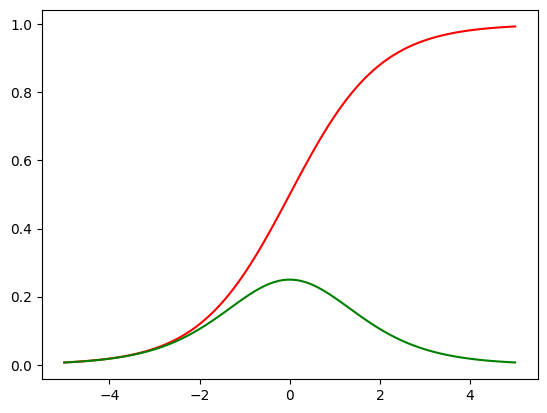

In [61]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()

def g(x):
    return 1 / (1 + np.exp(-x))
def dg(x):
    g_ = g(x)
    return g_*(1-g_)

x = np.linspace(-5,5,100)
y = g(x)

plt.plot(x,y, 'r')

x = np.linspace(-5,5,100)
y = dg(x)

ax = plt.gca()
ax.set_facecolor('w')
plt.plot(x,y, 'g')


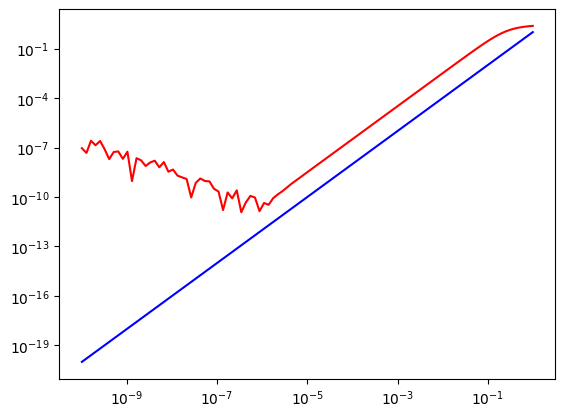

In [62]:

x = np.random.rand(700)
theta = np.zeros_like(x)

def h(x, theta):
    return g( np.dot(theta,x))

def dh(x, theta):
    return dg(np.dot(theta,x))*x

dtheta=np.random.rand(700)
dtheta/=np.sqrt(np.dot(dtheta,dtheta))

def error(x,theta,dtheta,eps):
    return np.abs(h(x,theta+eps*dtheta)-h(x,theta)-eps*np.dot(dh(x,theta),dtheta))/eps

epsvals = np.logspace(-10,0,100)
yE = np.zeros(100)
for i,val in enumerate(epsvals):
    yE[i]= error(x,theta,dtheta,val)
ax= fig.axes
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.loglog(epsvals,yE, 'r')
plt.loglog(epsvals,epsvals**2, 'b')
# plt.plot(epsvals,yE, 'r')
# plt.plot(epsvals,epsvals, 'b')
# ax.set_yscale('log')

In [74]:
ndata = 20
sizeMiddleLayer= 60
outPutLayerSize= 10
x=np.random.rand(ndata)
theta1 =np.random.rand(sizeMiddleLayer,ndata)
theta2 =np.random.rand(outPutLayerSize,sizeMiddleLayer)

In [75]:
z1 = x
a1 = x
print(a1)
z2 = theta1@a1
a2 = g(z2)

[0.55902014 0.61774684 0.00454519 0.42113182 0.77745817 0.72256179
 0.02152939 0.39422473 0.77556067 0.19695677 0.70254653 0.59279054
 0.74298875 0.48454838 0.8435442  0.20716666 0.51585246 0.67122631
 0.5240965  0.33901027]


In [76]:
z3 = theta2@a2
a3 = g(z3)

### Backpropagation

In [77]:
y= np.ones(outPutLayerSize)
delta3 = a3-y
delta2 = np.transpose(theta2)@delta3 * dg(z2)
print(delta2)


[-1.10001239e-14 -2.55988081e-15 -1.19914127e-14 -3.91515140e-15
 -1.95638755e-15 -7.59089029e-15 -1.21036711e-14 -1.92275922e-15
 -3.43886608e-15 -2.55551721e-15 -1.88815796e-15 -1.09877833e-14
 -1.13739336e-14 -1.17083361e-14 -7.80584875e-15 -2.12802014e-14
 -1.39682691e-14 -3.48052423e-14 -3.79308914e-15 -5.69725728e-15
 -4.06206759e-15 -3.46637789e-14 -1.44936984e-15 -1.08777738e-14
 -5.12196321e-15 -3.30262392e-15 -7.30924645e-15 -1.67824216e-15
 -5.57252915e-15 -1.47260642e-14 -1.01463619e-14 -4.48260376e-15
 -2.43049510e-14 -3.48549129e-15 -9.45246268e-15 -2.69672979e-15
 -2.18664820e-14 -6.33890173e-15 -1.82931069e-15 -7.83162510e-15
 -4.40060450e-15 -3.83402758e-15 -1.28040293e-14 -9.89208902e-15
 -2.80900432e-15 -3.98187082e-15 -6.40832334e-15 -2.27442829e-15
 -7.80064170e-15 -2.09676664e-14 -1.17504295e-15 -1.12911988e-14
 -1.09765414e-14 -3.63675218e-15 -5.19956915e-15 -2.18220421e-15
 -7.27585462e-15 -5.58461555e-15 -4.25873444e-15 -1.39445485e-14]


In [78]:
# Delta = np.zeros(outPutLayerSize)

a1=np.reshape(a1,(len(a1),1))
a2=np.reshape(a2,(len(a2),1))
print("Shape a1: ",np.shape(a1))
print("Shape a2: ",np.shape(a2))

delta2=np.reshape(delta2,(len(delta2),1))
delta3=np.reshape(delta3,(len(delta3),1))
print("Shape delta2: ",np.shape(delta2))
print("Shape delta3: ",np.shape(delta3))
Delta2 = delta2@np.transpose(a1)
Delta3 = delta3@np.transpose(a2)


Shape a1:  (20, 1)
Shape a2:  (60, 1)
Shape delta2:  (60, 1)
Shape delta3:  (10, 1)


In [79]:
Y = np.ones((ndata, outPutLayerSize))
# print(Y)
X_v = np.random.rand(ndata, 28 * 28)

thetaArray = [np.random.rand(sizeMiddleLayer, ndata),
              np.random.rand(outPutLayerSize, sizeMiddleLayer)]


def J(X_v_, Y_v, thetaArray_):
    res = 0
    for i in range(ndata):
        for k in range(outPutLayerSize):
            h_ = h(X_v_[i], thetaArray_[i])
            logh = np.log(h_)
            res += -Y_v(i, k) * logh - (1 - Y_v(i, k)) * logh
    return res


print(J(X_v, Y, thetaArray))


ValueError: shapes (60,20) and (784,) not aligned: 20 (dim 1) != 784 (dim 0)